___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://machinelearningmastery.com/wp-content/uploads/2016/03/Compare-Machine-Learning-Algorithms.png" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2022
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___


### <font color= #2E9AFE> Tema: Comparación de modelos de regresión</font>

Una vez que aprendimos a crear los modelos de machine learning ¿qué hacemos con ellos?

Comparar varios modelos de machine learning para problemas de regresión es necesario para poder encontrar cuál de todos los modelos es el más eficiente y tiene los resultados más precisos. 

Hay muchos criterios para comparar los modelos. 

Recordando que si la **variable de respuesta es continua** entonces, este es un problema de **regresión** y tenemos que usar modelos de regresión para estimar los valores predichos. 

Como vimos, hay muchos modelos de regresión candidatos. Nuestra tarea es encontrar el que sirva a nuestro propósito.

Vamos a comparar los siguientes modelos:
- Regresión lineal múltiple
- Regresión LASSO
- Regresión Ridge
- Árbol de decisión
- Bosques Aleatorios
- SVR
- Redes Neuronales

Vamos a utilizar varias métricas para comparar los modelos.

### Métricas de Performance (Regresión)

**Error Absoluto Medio (Mean Absolute Error - MAE)**

Si $y$ es la variable de respuesta y $\hat{y}$ es la predicción, entonces el MAE es el error entre estos pares ($y$,$\hat{y}$) de variables y se calcula de la forma:

$$MAE = \frac{\sum_{i=1}^{n}|y_{i}-\hat{y}_{i}|}{n}$$

*¿Qué hace?*
- Mide el promedio del error absoluto entre los valores reales y las predicciones

*Ventajas*
- Es una métrica independiente de la escala, lo que significa que está en las mismas unidades de las variables originales. 
- Fácil de interpretar
- Es buena opción si no nos importan los valores atípicos

*Desventajas*
- Se les da la misma importancia (peso) a todos los errores
- Es insensible a valores atípicos



**Error Cuadrático Medio (Mean Square Error - MSE)**


$$MSE = \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{n}$$

*¿Qué hace?*
El MSE calcula el promedio de los cuadrados del error entre los valores verdaderos y los valores estimados

*Ventajas*
- Función diferenciable
- El efecto de errores más grandes se vuelve más pronunciado que los errores más pequeños

*Desventajas*
- Tiene diferentes unidades que los valores reales


**Diferencia entre el MAE y el MSE**

La gran diferencia es cómo responden a errores más grandes. 

Depende mucho de la decisión del negocio y el costo asociado a los errores. 
     
 **R^2**
 
 $$R^{2}=1-\frac{SS_{res}}{SS_{Tot}}= \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{\sum_{i=1}^{n}(y_{i}-\bar{y}_{i})^{2}}$$
 
 *¿Qué hace?*
- Explica la proporción de la varianza de la salida ("Y") que puede ser explicada por los predictores ("X")

*Desventajas*
- Siempre incrementa añadiendo más variables independientes (X), lo cual es una desventaja porque esas variables pueden no ser importantes para el modelo

*Ventajas*
- Es una métrica relativa que se usa para comparar varios modelos que fueron entrenados con los mismos datos

     
     
 

### Los Datos

Tenemos un dataset de personas que tienen un carro y lo quieren vender. Se tienen las siguientes variables:

- Age 
- Gender
- Miles: promedio de millas manejadas por día
- Debt
- Income
- Sales

Basados en esas variables, queremos predecir el valor potencial de venta de un carro, por lo que variable a predecir es "Sales". 

In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Librerías

import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns 
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD, Adam


In [3]:
#cargar datos
datos = pd.read_csv('carros.csv')
datos.head()

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


In [4]:
#Revisamos si hay datos nulos
missing = pd.DataFrame(datos.isnull().sum(),columns=['Valores_Nulos'])
missing

,Valores_Nulos
age,0
gender,0
miles,0
debt,0
income,0
sales,0


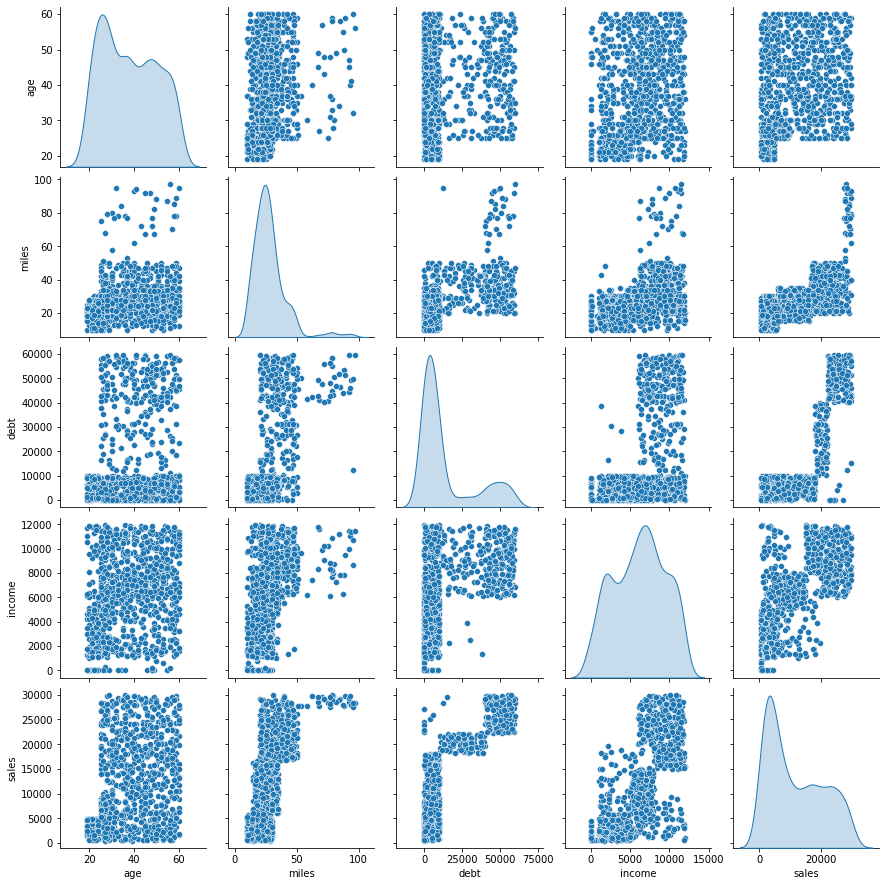

In [5]:
#Creamos gráficos básicos de los datos
sns.pairplot(datos[['age', 'miles', 'debt', 'income', 'sales']], diag_kind="kde")

In [6]:
#Calculando estadísticas básicas con los datos
datos_stats = datos.describe()
datos_stats = datos_stats.transpose()
datos_stats

,count,mean,std,min,25%,50%,75%,max
age,963.0,37.971963,12.290838,19.0,27.0,37.0,49.0,60.0
gender,963.0,0.512980,0.500091,0.0,0.0,1.0,1.0,1.0
miles,963.0,27.704050,13.378181,10.0,20.0,25.0,32.0,97.0
debt,963.0,14109.004154,18273.702481,0.0,1475.0,6236.0,16686.0,59770.0
income,963.0,6176.047767,3260.670142,0.0,3506.5,6360.0,8649.5,11970.0
sales,963.0,11689.860852,8986.896921,500.0,3554.0,9130.0,19245.0,29926.0


De las estadísticas anteriores podemos observar que algunas variables tienen grandes rangos y desviaciones, lo cual puede crear problemas durante el ajuste del modelo. Por lo tanto sería buena idea escalar los datos. 

### Train Test split

In [7]:
#separar la X y Y
X=datos.iloc[:,0:5]
y=datos.iloc[:,5]

#Dividimos los datos en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
#Estandarizar datos
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
y_train = preprocessing.scale(y_train)
X_test = preprocessing.scale(X_test)
y_test = preprocessing.scale(y_test)

**¿Porqué estandarizar los datos después del train test split?**

El escalamiento debe realizarse después de dividir los datos en entrenamiento y prueba, y se debe hacer sólo usando los datos de entrenamiento. 

Esto se debe a que los datos de prueba (test) tienen el papel de datos no vistos por el modelo, por lo que se supone que estos datos no están accesibles en la estapa del entrenamiento. 

Usar cualquier información proveniente de los datos de prueba antes o durante el entranamiento puede afectar al desempeño del modelo

#### Regresión Lineal 


In [9]:
#Inicializo objeto de regresión lineal
lin_reg = LinearRegression()
#Entrenar modelo
lin_reg.fit(X_train, y_train)
#Predecimos con datos de prueba
y_pred = lin_reg.predict(X_test)
#Métricas de performance
mae_lr = metrics.mean_absolute_error(y_test,y_pred)
mse_lr = metrics.mean_squared_error(y_test,y_pred)
r2_lr = metrics.r2_score(y_test,y_pred)


# Imprimir resultados
print('R2: ',r2_lr)
print('Mae: ',mae_lr)
print('Mse: ',mse_lr)
print('Rmse: ',np.sqrt(mse_lr))

R2:  0.8364108886819762
Mae:  0.3119007815345351
Mse:  0.16358911131802378
Rmse:  0.404461507832357


#### Regresión Lineal con selección de variables

In [10]:
rfe = RFE(lin_reg)
rfe = rfe.fit(X_train, y_train)
#Predecimos con datos de prueba
y_pred = rfe.predict (X_test)
#Métricas de performance
mae_rfe = metrics.mean_absolute_error(y_test, y_pred)
mse_rfe = metrics.mean_squared_error(y_test, y_pred)
r2_rfe = metrics.r2_score(y_test, y_pred)
# Imprimir resultados
print('R2: ',r2_lr)
print('Mae: ',mae_lr)
print('Mse: ',mse_lr)
print('Rmse: ',np.sqrt(mse_lr))

R2:  0.8364108886819762
Mae:  0.3119007815345351
Mse:  0.16358911131802378
Rmse:  0.404461507832357


#### Regresión Lineal con regularización Ridge


In [11]:
#Inicializo modelo de ridge con alpha = 1
ridge = Ridge(alpha=1)
#Entrenar modelo
ridge.fit(X_train,y_train)
#Predecir con datos de prueba
ridge_pred = ridge.predict(X_test)

#Métricas de performance
mae_ridge = metrics.mean_absolute_error(y_test, ridge_pred)
mse_ridge=metrics.mean_squared_error(y_test, ridge_pred)
r2_ridge = r2_score(y_test, ridge_pred)

# Imprimir resultados
print('R2:  ',r2_ridge)
print('MAE: ', mae_ridge)
print('MSE: ', mse_ridge)
print('RMSE:', np.sqrt(mse_ridge))

R2:   0.8364172531254731
MAE:  0.3119341315613786
MSE:  0.16358274687452687
RMSE: 0.4044536399570745


#### Bosques Aleatorios

In [12]:
#Inicializamos el bosque con 300 árboles
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X_train,y_train)

#Predecir el precio de venta  
y_pred = rf_regressor.predict(X_test)

#Calcular métricas
mae_rf=metrics.mean_absolute_error(y_test, y_pred)
mse_rf=metrics.mean_squared_error(y_test, y_pred)
r2_rf=metrics.r2_score(y_test, y_pred)

#Imprimir métricas
print('R2 square:',r2_rf)
print('MAE: ', mae_rf)
print('MSE: ', mse_rf)

R2 square: 0.9084579202821852
MAE:  0.21442115274283988
MSE:  0.09154207971781475


#### Máquina de Soporte Vectorial para Regresión (SVR)

In [13]:
#Inicializar objeto
regressor= SVR(kernel='rbf')
#Entrenar modelo
regressor.fit(X_train,y_train)
#Predecir
y_pred_svm=regressor.predict(X_test)

#Calcular métricas
mae_svr=metrics.mean_absolute_error(y_test, y_pred_svm)
mse_svr=metrics.mean_squared_error(y_test, y_pred_svm)
r2_svr=metrics.r2_score(y_test, y_pred_svm)

# Imprimir Métricas
print('R2 square:',r2_svr)
print('MAE: ', mae_svr)
print('MSE: ', mse_svr)

R2 square: 0.8939968531978243
MAE:  0.23686136868452895
MSE:  0.10600314680217567


#### Red Neuronal

In [14]:
#Hiperparámetros iniciales
epochs = 1000
learning_rate = 0.1
decay_rate = learning_rate/epochs
momentum = 0.8

# Crear arquitectura de la red neuronal
model = Sequential()
#5 variables de entrada, por lo tanto input_dim=5
model.add(Dense(12,activation='relu',input_dim=5))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='linear'))

# Configuración del optimizador
#gradiente descendente
opt = keras.optimizers.SGD(lr=learning_rate,momentum=momentum,
                           decay=decay_rate,nesterov=True)
#opt = keras.optimizers.Adam(lr=0.09)
model.compile(loss = 'mean_squared_error',
              optimizer=opt,
              metrics=['mae','mse'])

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
#Ajustar modelo
history = model.fit(X_train,y_train,
                    epochs=epochs,
                    batch_size=200,
                    validation_data=(X_test,y_test))

Epoch 1/1000
4/4 [==============================] - 5s 257ms/step - loss: 0.7133 - mae: 0.7056 - mse: 0.7133 - val_loss: 0.2510 - val_mae: 0.4021 - val_mse: 0.2510
Epoch 2/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.2628 - mae: 0.4032 - mse: 0.2628 - val_loss: 0.1694 - val_mae: 0.3168 - val_mse: 0.1694
Epoch 3/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.1867 - mae: 0.3251 - mse: 0.1867 - val_loss: 0.1504 - val_mae: 0.3066 - val_mse: 0.1504
Epoch 4/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.1711 - mae: 0.3079 - mse: 0.1711 - val_loss: 0.1374 - val_mae: 0.2882 - val_mse: 0.1374
Epoch 5/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1679 - mae: 0.3005 - mse: 0.1679 - val_loss: 0.1301 - val_mae: 0.2772 - val_mse: 0.1301
Epoch 6/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1625 - mae: 0.2959 - mse: 0.1625 - val_loss: 0.1312 - val_mae: 0.2817 - val_mse: 0.1312
Epoch 7/1000
4/4 [===

4/4 [==============================] - 0s 26ms/step - loss: 0.1247 - mae: 0.2548 - mse: 0.1247 - val_loss: 0.1157 - val_mae: 0.2450 - val_mse: 0.1157
Epoch 52/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.1269 - mae: 0.2544 - mse: 0.1269 - val_loss: 0.1132 - val_mae: 0.2546 - val_mse: 0.1132
Epoch 53/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1247 - mae: 0.2584 - mse: 0.1247 - val_loss: 0.1203 - val_mae: 0.2476 - val_mse: 0.1203
Epoch 54/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.1263 - mae: 0.2562 - mse: 0.1263 - val_loss: 0.1210 - val_mae: 0.2747 - val_mse: 0.1210
Epoch 55/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1418 - mae: 0.2811 - mse: 0.1418 - val_loss: 0.1097 - val_mae: 0.2447 - val_mse: 0.1097
Epoch 56/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.1272 - mae: 0.2575 - mse: 0.1272 - val_loss: 0.1139 - val_mae: 0.2435 - val_mse: 0.1139
Epoch 57/1000
4/4 [===========

4/4 [==============================] - 0s 14ms/step - loss: 0.1206 - mae: 0.2468 - mse: 0.1206 - val_loss: 0.1180 - val_mae: 0.2625 - val_mse: 0.1180
Epoch 102/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1229 - mae: 0.2560 - mse: 0.1229 - val_loss: 0.1238 - val_mae: 0.2476 - val_mse: 0.1238
Epoch 103/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.1242 - mae: 0.2563 - mse: 0.1242 - val_loss: 0.1178 - val_mae: 0.2441 - val_mse: 0.1178
Epoch 104/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.1202 - mae: 0.2510 - mse: 0.1202 - val_loss: 0.1491 - val_mae: 0.2757 - val_mse: 0.1491
Epoch 105/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.1318 - mae: 0.2668 - mse: 0.1318 - val_loss: 0.1192 - val_mae: 0.2461 - val_mse: 0.1192
Epoch 106/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1239 - mae: 0.2521 - mse: 0.1239 - val_loss: 0.1168 - val_mae: 0.2423 - val_mse: 0.1168
Epoch 107/1000
4/4 [=====

Epoch 151/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.1161 - mae: 0.2426 - mse: 0.1161 - val_loss: 0.1127 - val_mae: 0.2433 - val_mse: 0.1127
Epoch 152/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.1173 - mae: 0.2467 - mse: 0.1173 - val_loss: 0.1117 - val_mae: 0.2422 - val_mse: 0.1117
Epoch 153/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.1153 - mae: 0.2400 - mse: 0.1153 - val_loss: 0.1120 - val_mae: 0.2443 - val_mse: 0.1120
Epoch 154/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.1147 - mae: 0.2419 - mse: 0.1147 - val_loss: 0.1139 - val_mae: 0.2431 - val_mse: 0.1139
Epoch 155/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.1212 - mae: 0.2488 - mse: 0.1212 - val_loss: 0.1488 - val_mae: 0.2814 - val_mse: 0.1488
Epoch 156/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.1287 - mae: 0.2581 - mse: 0.1287 - val_loss: 0.1163 - val_mae: 0.2488 - val_mse: 0.1163
Epoch 157/

Epoch 201/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.1207 - mae: 0.2528 - mse: 0.1207 - val_loss: 0.1084 - val_mae: 0.2386 - val_mse: 0.1084
Epoch 202/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.1098 - mae: 0.2379 - mse: 0.1098 - val_loss: 0.1198 - val_mae: 0.2711 - val_mse: 0.1198
Epoch 203/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.1131 - mae: 0.2480 - mse: 0.1131 - val_loss: 0.1179 - val_mae: 0.2442 - val_mse: 0.1179
Epoch 204/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.1158 - mae: 0.2465 - mse: 0.1158 - val_loss: 0.1134 - val_mae: 0.2479 - val_mse: 0.1134
Epoch 205/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.1132 - mae: 0.2458 - mse: 0.1132 - val_loss: 0.1104 - val_mae: 0.2447 - val_mse: 0.1104
Epoch 206/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.1094 - mae: 0.2388 - mse: 0.1094 - val_loss: 0.1164 - val_mae: 0.2421 - val_mse: 0.1164
Epoch 207/

Epoch 251/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.1127 - mae: 0.2442 - mse: 0.1127 - val_loss: 0.1109 - val_mae: 0.2456 - val_mse: 0.1109
Epoch 252/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.1063 - mae: 0.2349 - mse: 0.1063 - val_loss: 0.1072 - val_mae: 0.2412 - val_mse: 0.1072
Epoch 253/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1050 - mae: 0.2329 - mse: 0.1050 - val_loss: 0.1095 - val_mae: 0.2437 - val_mse: 0.1095
Epoch 254/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1057 - mae: 0.2341 - mse: 0.1057 - val_loss: 0.1135 - val_mae: 0.2406 - val_mse: 0.1135
Epoch 255/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1079 - mae: 0.2387 - mse: 0.1079 - val_loss: 0.1104 - val_mae: 0.2533 - val_mse: 0.1104
Epoch 256/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1084 - mae: 0.2409 - mse: 0.1084 - val_loss: 0.1131 - val_mae: 0.2416 - val_mse: 0.1131
Epoch 257/

Epoch 301/1000
4/4 [==============================] - 0s 30ms/step - loss: 0.1022 - mae: 0.2332 - mse: 0.1022 - val_loss: 0.1176 - val_mae: 0.2500 - val_mse: 0.1176
Epoch 302/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1043 - mae: 0.2352 - mse: 0.1043 - val_loss: 0.1116 - val_mae: 0.2470 - val_mse: 0.1116
Epoch 303/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1047 - mae: 0.2350 - mse: 0.1047 - val_loss: 0.1242 - val_mae: 0.2532 - val_mse: 0.1242
Epoch 304/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1075 - mae: 0.2355 - mse: 0.1075 - val_loss: 0.1121 - val_mae: 0.2565 - val_mse: 0.1121
Epoch 305/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1127 - mae: 0.2497 - mse: 0.1127 - val_loss: 0.1123 - val_mae: 0.2554 - val_mse: 0.1123
Epoch 306/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.1100 - mae: 0.2439 - mse: 0.1100 - val_loss: 0.1126 - val_mae: 0.2459 - val_mse: 0.1126
Epoch 307/

Epoch 351/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1083 - mae: 0.2405 - mse: 0.1083 - val_loss: 0.1196 - val_mae: 0.2522 - val_mse: 0.1196
Epoch 352/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1059 - mae: 0.2364 - mse: 0.1059 - val_loss: 0.1152 - val_mae: 0.2552 - val_mse: 0.1152
Epoch 353/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1019 - mae: 0.2322 - mse: 0.1019 - val_loss: 0.1126 - val_mae: 0.2429 - val_mse: 0.1126
Epoch 354/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.1017 - mae: 0.2302 - mse: 0.1017 - val_loss: 0.1129 - val_mae: 0.2526 - val_mse: 0.1129
Epoch 355/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.1041 - mae: 0.2344 - mse: 0.1041 - val_loss: 0.1171 - val_mae: 0.2478 - val_mse: 0.1171
Epoch 356/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.1017 - mae: 0.2282 - mse: 0.1017 - val_loss: 0.1137 - val_mae: 0.2467 - val_mse: 0.1137
Epoch 357/

Epoch 401/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1042 - mae: 0.2327 - mse: 0.1042 - val_loss: 0.1122 - val_mae: 0.2434 - val_mse: 0.1122
Epoch 402/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1004 - mae: 0.2308 - mse: 0.1004 - val_loss: 0.1128 - val_mae: 0.2442 - val_mse: 0.1128
Epoch 403/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1024 - mae: 0.2332 - mse: 0.1024 - val_loss: 0.1169 - val_mae: 0.2607 - val_mse: 0.1169
Epoch 404/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1062 - mae: 0.2374 - mse: 0.1062 - val_loss: 0.1245 - val_mae: 0.2794 - val_mse: 0.1245
Epoch 405/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1109 - mae: 0.2483 - mse: 0.1109 - val_loss: 0.1217 - val_mae: 0.2735 - val_mse: 0.1217
Epoch 406/1000
4/4 [==============================] - 0s 66ms/step - loss: 0.1096 - mae: 0.2475 - mse: 0.1096 - val_loss: 0.1228 - val_mae: 0.2567 - val_mse: 0.1228
Epoch 407/

Epoch 451/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.0990 - mae: 0.2244 - mse: 0.0990 - val_loss: 0.1209 - val_mae: 0.2604 - val_mse: 0.1209
Epoch 452/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.1010 - mae: 0.2311 - mse: 0.1010 - val_loss: 0.1148 - val_mae: 0.2447 - val_mse: 0.1148
Epoch 453/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0992 - mae: 0.2251 - mse: 0.0992 - val_loss: 0.1220 - val_mae: 0.2544 - val_mse: 0.1220
Epoch 454/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0993 - mae: 0.2281 - mse: 0.0993 - val_loss: 0.1237 - val_mae: 0.2526 - val_mse: 0.1237
Epoch 455/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.1017 - mae: 0.2320 - mse: 0.1017 - val_loss: 0.1169 - val_mae: 0.2506 - val_mse: 0.1169
Epoch 456/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0981 - mae: 0.2282 - mse: 0.0981 - val_loss: 0.1347 - val_mae: 0.2694 - val_mse: 0.1347
Epoch 457/

Epoch 501/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0984 - mae: 0.2268 - mse: 0.0984 - val_loss: 0.1204 - val_mae: 0.2548 - val_mse: 0.1204
Epoch 502/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.1004 - mae: 0.2300 - mse: 0.1004 - val_loss: 0.1196 - val_mae: 0.2502 - val_mse: 0.1196
Epoch 503/1000
4/4 [==============================] - 0s 44ms/step - loss: 0.0962 - mae: 0.2226 - mse: 0.0962 - val_loss: 0.1256 - val_mae: 0.2660 - val_mse: 0.1256
Epoch 504/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.0993 - mae: 0.2313 - mse: 0.0993 - val_loss: 0.1606 - val_mae: 0.2999 - val_mse: 0.1606
Epoch 505/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.1258 - mae: 0.2591 - mse: 0.1258 - val_loss: 0.1170 - val_mae: 0.2508 - val_mse: 0.1170
Epoch 506/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0969 - mae: 0.2234 - mse: 0.0969 - val_loss: 0.1498 - val_mae: 0.2852 - val_mse: 0.1498
Epoch 507/

Epoch 551/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1079 - mae: 0.2403 - mse: 0.1079 - val_loss: 0.1219 - val_mae: 0.2693 - val_mse: 0.1219
Epoch 552/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1025 - mae: 0.2366 - mse: 0.1025 - val_loss: 0.1184 - val_mae: 0.2533 - val_mse: 0.1184
Epoch 553/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0955 - mae: 0.2219 - mse: 0.0955 - val_loss: 0.1247 - val_mae: 0.2710 - val_mse: 0.1247
Epoch 554/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0985 - mae: 0.2305 - mse: 0.0985 - val_loss: 0.1244 - val_mae: 0.2719 - val_mse: 0.1244
Epoch 555/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0979 - mae: 0.2305 - mse: 0.0979 - val_loss: 0.1206 - val_mae: 0.2543 - val_mse: 0.1206
Epoch 556/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0982 - mae: 0.2276 - mse: 0.0982 - val_loss: 0.1197 - val_mae: 0.2628 - val_mse: 0.1197
Epoch 557/

Epoch 601/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0950 - mae: 0.2248 - mse: 0.0950 - val_loss: 0.1206 - val_mae: 0.2572 - val_mse: 0.1206
Epoch 602/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0949 - mae: 0.2234 - mse: 0.0949 - val_loss: 0.1290 - val_mae: 0.2759 - val_mse: 0.1290
Epoch 603/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0994 - mae: 0.2307 - mse: 0.0994 - val_loss: 0.1373 - val_mae: 0.2780 - val_mse: 0.1373
Epoch 604/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.1035 - mae: 0.2365 - mse: 0.1035 - val_loss: 0.1184 - val_mae: 0.2596 - val_mse: 0.1184
Epoch 605/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0957 - mae: 0.2244 - mse: 0.0957 - val_loss: 0.1195 - val_mae: 0.2600 - val_mse: 0.1195
Epoch 606/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0975 - mae: 0.2256 - mse: 0.0975 - val_loss: 0.1347 - val_mae: 0.2680 - val_mse: 0.1347
Epoch 607/

Epoch 651/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0984 - mae: 0.2295 - mse: 0.0984 - val_loss: 0.1536 - val_mae: 0.2907 - val_mse: 0.1536
Epoch 652/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.1002 - mae: 0.2309 - mse: 0.1002 - val_loss: 0.1260 - val_mae: 0.2598 - val_mse: 0.1260
Epoch 653/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0933 - mae: 0.2179 - mse: 0.0933 - val_loss: 0.1200 - val_mae: 0.2637 - val_mse: 0.1200
Epoch 654/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0977 - mae: 0.2291 - mse: 0.0977 - val_loss: 0.1274 - val_mae: 0.2605 - val_mse: 0.1274
Epoch 655/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0937 - mae: 0.2179 - mse: 0.0937 - val_loss: 0.1280 - val_mae: 0.2770 - val_mse: 0.1280
Epoch 656/1000
4/4 [==============================] - 0s 42ms/step - loss: 0.1015 - mae: 0.2348 - mse: 0.1015 - val_loss: 0.1177 - val_mae: 0.2515 - val_mse: 0.1177
Epoch 657/

Epoch 701/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0972 - mae: 0.2284 - mse: 0.0972 - val_loss: 0.1508 - val_mae: 0.2884 - val_mse: 0.1508
Epoch 702/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.1040 - mae: 0.2292 - mse: 0.1040 - val_loss: 0.1229 - val_mae: 0.2616 - val_mse: 0.1229
Epoch 703/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0922 - mae: 0.2179 - mse: 0.0922 - val_loss: 0.1256 - val_mae: 0.2657 - val_mse: 0.1256
Epoch 704/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0938 - mae: 0.2228 - mse: 0.0938 - val_loss: 0.1305 - val_mae: 0.2796 - val_mse: 0.1305
Epoch 705/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.1061 - mae: 0.2391 - mse: 0.1061 - val_loss: 0.1357 - val_mae: 0.2888 - val_mse: 0.1357
Epoch 706/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.1004 - mae: 0.2306 - mse: 0.1004 - val_loss: 0.1243 - val_mae: 0.2700 - val_mse: 0.1243
Epoch 707/

Epoch 751/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1078 - mae: 0.2392 - mse: 0.1078 - val_loss: 0.1541 - val_mae: 0.2886 - val_mse: 0.1541
Epoch 752/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0964 - mae: 0.2258 - mse: 0.0964 - val_loss: 0.1340 - val_mae: 0.2680 - val_mse: 0.1340
Epoch 753/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0927 - mae: 0.2177 - mse: 0.0927 - val_loss: 0.1207 - val_mae: 0.2586 - val_mse: 0.1207
Epoch 754/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0925 - mae: 0.2167 - mse: 0.0925 - val_loss: 0.1319 - val_mae: 0.2826 - val_mse: 0.1319
Epoch 755/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.1031 - mae: 0.2361 - mse: 0.1031 - val_loss: 0.1249 - val_mae: 0.2670 - val_mse: 0.1249
Epoch 756/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0952 - mae: 0.2226 - mse: 0.0952 - val_loss: 0.1255 - val_mae: 0.2580 - val_mse: 0.1255
Epoch 757/

Epoch 801/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0917 - mae: 0.2190 - mse: 0.0917 - val_loss: 0.1400 - val_mae: 0.2748 - val_mse: 0.1400
Epoch 802/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1004 - mae: 0.2307 - mse: 0.1004 - val_loss: 0.1244 - val_mae: 0.2605 - val_mse: 0.1244
Epoch 803/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0925 - mae: 0.2184 - mse: 0.0925 - val_loss: 0.1274 - val_mae: 0.2618 - val_mse: 0.1274
Epoch 804/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0924 - mae: 0.2186 - mse: 0.0924 - val_loss: 0.1341 - val_mae: 0.2713 - val_mse: 0.1341
Epoch 805/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0921 - mae: 0.2170 - mse: 0.0921 - val_loss: 0.1259 - val_mae: 0.2608 - val_mse: 0.1259
Epoch 806/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0915 - mae: 0.2166 - mse: 0.0915 - val_loss: 0.1276 - val_mae: 0.2636 - val_mse: 0.1276
Epoch 807/

Epoch 851/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0936 - mae: 0.2206 - mse: 0.0936 - val_loss: 0.1292 - val_mae: 0.2619 - val_mse: 0.1292
Epoch 852/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0929 - mae: 0.2178 - mse: 0.0929 - val_loss: 0.1242 - val_mae: 0.2640 - val_mse: 0.1242
Epoch 853/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0940 - mae: 0.2197 - mse: 0.0940 - val_loss: 0.1268 - val_mae: 0.2728 - val_mse: 0.1268
Epoch 854/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1024 - mae: 0.2339 - mse: 0.1024 - val_loss: 0.1531 - val_mae: 0.2909 - val_mse: 0.1531
Epoch 855/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1053 - mae: 0.2396 - mse: 0.1053 - val_loss: 0.1267 - val_mae: 0.2608 - val_mse: 0.1267
Epoch 856/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0930 - mae: 0.2200 - mse: 0.0930 - val_loss: 0.1206 - val_mae: 0.2548 - val_mse: 0.1206
Epoch 857/

Epoch 901/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0989 - mae: 0.2311 - mse: 0.0989 - val_loss: 0.1244 - val_mae: 0.2687 - val_mse: 0.1244
Epoch 902/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0967 - mae: 0.2266 - mse: 0.0967 - val_loss: 0.1253 - val_mae: 0.2690 - val_mse: 0.1253
Epoch 903/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0939 - mae: 0.2223 - mse: 0.0939 - val_loss: 0.1241 - val_mae: 0.2593 - val_mse: 0.1241
Epoch 904/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0912 - mae: 0.2140 - mse: 0.0912 - val_loss: 0.1324 - val_mae: 0.2822 - val_mse: 0.1324
Epoch 905/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0957 - mae: 0.2245 - mse: 0.0957 - val_loss: 0.1234 - val_mae: 0.2593 - val_mse: 0.1234
Epoch 906/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0906 - mae: 0.2161 - mse: 0.0906 - val_loss: 0.1303 - val_mae: 0.2727 - val_mse: 0.1303
Epoch 907/

Epoch 951/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0897 - mae: 0.2144 - mse: 0.0897 - val_loss: 0.1247 - val_mae: 0.2632 - val_mse: 0.1247
Epoch 952/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0901 - mae: 0.2151 - mse: 0.0901 - val_loss: 0.1255 - val_mae: 0.2642 - val_mse: 0.1255
Epoch 953/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0893 - mae: 0.2141 - mse: 0.0893 - val_loss: 0.1239 - val_mae: 0.2613 - val_mse: 0.1239
Epoch 954/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0899 - mae: 0.2151 - mse: 0.0899 - val_loss: 0.1216 - val_mae: 0.2614 - val_mse: 0.1216
Epoch 955/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0923 - mae: 0.2161 - mse: 0.0923 - val_loss: 0.1320 - val_mae: 0.2820 - val_mse: 0.1320
Epoch 956/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1176 - mae: 0.2611 - mse: 0.1176 - val_loss: 0.1268 - val_mae: 0.2623 - val_mse: 0.1268
Epoch 957/

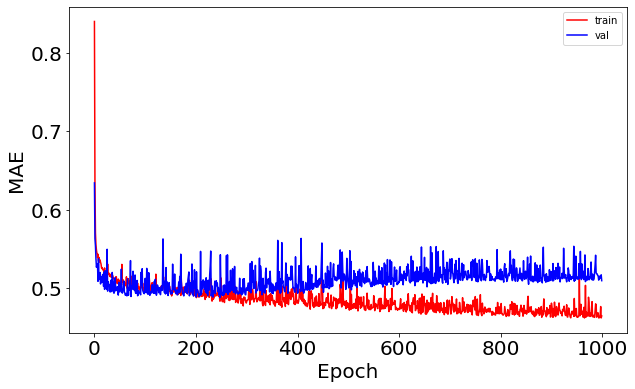

In [16]:
#Graficar el MAE
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['mae']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_mae']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MAE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

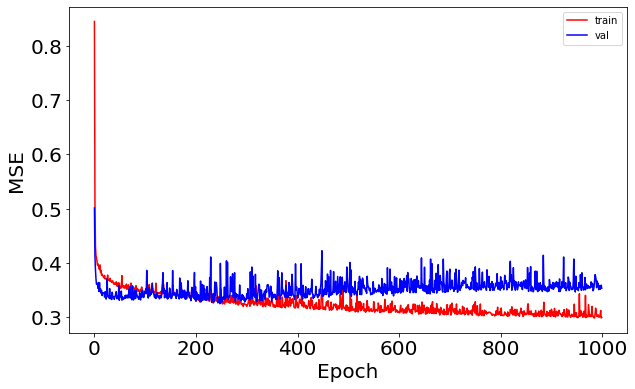

In [17]:
#Graficar el MSE
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

Con los gráficos de arriba podemos observar que tanto las métricas de train y de validación disminuyen exponencialmentes con el incremento del número de épocas. 

10/10 [==============================] - 0s 41ms/step


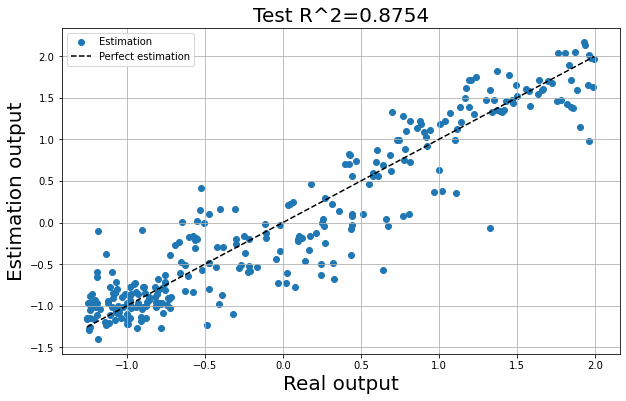

In [18]:
#Predecir
yhat = model.predict(X_test)

#Calcular R2
R2_score = r2_score(y_test,yhat)

#Graficar la R2
xmin,xmax = min(y_test),max(y_test)
xline = np.linspace(xmin,xmax)
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,yhat,label='Estimation')
plt.plot(xline,xline,'k--',label='Perfect estimation')
plt.xlabel('Real output', fontsize=20)
plt.ylabel('Estimation output', fontsize=20)
plt.title('Test R^2=%0.4f'%R2_score, fontsize=20)
plt.legend()
plt.grid()
plt.show()

In [19]:
#Calcular métricas
mae_nn=metrics.mean_absolute_error(y_test, yhat)
mse_nn=metrics.mean_squared_error(y_test, yhat)
r2_nn=metrics.r2_score(y_test, yhat)

# imprimir Métricas
print('R2 square:',r2_nn)
print('MAE: ', mae_nn)
print('MSE: ', mse_nn)

R2 square: 0.8753596111416949
MAE:  0.2594766233177252
MSE:  0.12464038885830507


#### Resultados con train test split

In [20]:
data_compar_train_test = {'Modelo': ['LR', 'LR RFE', 'Ridge', 'RF', ' SVR', 'NN'], 'R2': [r2_lr, r2_rfe, r2_ridge, r2_rf, r2_svr, r2_nn], 'MSE': [mse_lr, mse_rfe, mse_ridge, mse_rf, mse_svr, mse_nn], 'MAE': [mae_lr, mae_rfe, mae_ridge,mae_rf,mae_svr, mae_nn]} 
data_compar_train_test = pd.DataFrame(data_compar_train_test)
data_compar_train_test

,Modelo,R2,MSE,MAE
0,LR,0.836411,0.163589,0.311901
1,LR RFE,0.798899,0.201101,0.334848
2,Ridge,0.836417,0.163583,0.311934
3,RF,0.908458,0.091542,0.214421
4,SVR,0.893997,0.106003,0.236861
5,NN,0.875360,0.124640,0.259477


### Cross Validation con optimización de hiperparámetros

La idea es dividir los datos en train y test, entrenar múltiples modelos muestreando los datos de entrenamiento. 
Finalmente probar el modelo en el test set



<img style="float: center; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/700/1*4G__SV580CxFj78o9yUXuQ.png" width="450px" height="280px" />


In [21]:
#Configurar los folds que vamos a usar para todos los modelos
n_folds = 5
seed = 7
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)

#### Regresión Lineal

In [22]:
#Inicializar modelo
lm=LinearRegression()

#Hacer el cross validation y probar con el train
r2_lr= (cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_lr= -(cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_lr= (-cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_lr)
print("MAE Train", mae_lr)
print("MSE Train", mse_lr)

R2 train 0.8158013380172221
MAE Train 0.3258039481837593
MSE Train 0.18158541560608504


In [23]:
#Performance en el test
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

mae_lr=metrics.mean_absolute_error(y_test,y_pred)
mse_lr=metrics.mean_squared_error(y_test,y_pred)
r2_lr=metrics.r2_score(y_test,y_pred)

results_lr = pd.DataFrame([['Linear regression', mae_lr,mse_lr,r2_lr]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_lr


,Model,MAE,MSE,R2
0,Linear regression,0.311901,0.163589,0.836411


#### Regresión lineal con selección de variables (RFE)

In [24]:
# Hacer el grid search
#Especificar el modelo
lm = LinearRegression()
#Ajustar datos
lm.fit(X_train, y_train)
#Inicializar modelo de Recursive Feature Elimination para selección de variables
rfe = RFE(lm)             

#Especificar rango de hiperparámetros a tunear
hyper_params = [{'n_features_to_select': list(range(1, np.shape(X_train)[1]+1))}]

# Crear el grid search
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = kfold, 
                        verbose = 1,
                        return_train_score=True)      


#Performance en el test
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)

mae_rfe=metrics.mean_absolute_error(y_test,y_pred)
mse_rfe=metrics.mean_squared_error(y_test,y_pred)
r2_rfe=metrics.r2_score(y_test,y_pred)

results_rfe = pd.DataFrame([['Linear regression RFE', mae_rfe,mse_rfe,r2_rfe]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_rfe

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,Model,MAE,MSE,R2
0,Linear regression RFE,0.31151,0.163283,0.836717


#### Rigde

In [25]:
from sklearn.linear_model import RidgeCV
#Inicializar modelo de Ridge con cross validation para seleccionar el hiperparámetro de alpha óptimo
model = RidgeCV(alphas=np.arange(0.01,5,0.01), cv=kfold, scoring='neg_mean_squared_error') 
#Entreno modelo
model.fit(X_train, y_train)

#Alfa óptima
print('alfa: %f' % model.alpha_)

#Performance en el test
y_pred = model.predict(X_test)

mae_ridge=metrics.mean_absolute_error(y_test,y_pred)
mse_ridge=metrics.mean_squared_error(y_test,y_pred)
r2_ridge=metrics.r2_score(y_test,y_pred)

results_ridge = pd.DataFrame([['Linear regression Ridge', mae_ridge,mse_ridge,r2_ridge]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_ridge

alfa: 4.240000


,Model,MAE,MSE,R2
0,Linear regression Ridge,0.312042,0.163572,0.836428


#### Random Forest



In [26]:
from sklearn.ensemble import RandomForestRegressor

#Usando cross validation y grid search
from sklearn.model_selection import GridSearchCV
#Inicializo modelo
model = RandomForestRegressor(min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
#Grid search para optimizar hiperparámetros
gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11), #profundidad del árbol
                                'min_samples_split': range(10, 60, 10),
                                'n_estimators': [100, 300, 500, 800], #número de árboles
                                'criterion': ['mse']}, 
                  cv=kfold,
                  scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

print(gs.best_params_)

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

{'criterion': 'mse', 'max_depth': 8, 'min_samples_split': 30, 'n_estimators': 800}


In [27]:
#crear modelo usando parámetros óptimos
new_model_RF = RandomForestRegressor(n_estimators=800,
                               criterion='mse',
                               max_depth=8,
                               min_samples_split=30,
                               min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
#Entreno modelo optimizado
new_model_RF.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_rf= (cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_rf= -(cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_rf= (-cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_rf)
print("MAE Train", mae_rf)
print("MSE Train", mse_rf)

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_fe

R2 train 0.8920603214443167
MAE Train 0.21984381446970488
MSE Train 0.10667653653789569


In [28]:
#Performance en el test
y_pred = new_model_RF.predict(X_test)

mae_rf=metrics.mean_absolute_error(y_test,y_pred)
mse_rf=metrics.mean_squared_error(y_test,y_pred)
r2_rf=metrics.r2_score(y_test,y_pred)

results_rf = pd.DataFrame([['Random Forest', mae_rf,mse_rf,r2_rf]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_rf

,Model,MAE,MSE,R2
0,Random Forest,0.208829,0.085517,0.914483


#### Árbol de decisión

In [29]:
#Usando cross validation y grid search
tree = DecisionTreeRegressor()

#Grid search para optimizar hiperparámetros
gs = GridSearchCV(tree,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=kfold,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'max_depth': 7, 'min_samples_split': 50}


In [30]:
#crear modelo usando parámetros óptimos
new_model_tree = DecisionTreeRegressor(max_depth=7,
                                  min_samples_split=50)

#Entreno modelo optimizado
new_model_tree.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_tree= (cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_tree= -(cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_tree= (-cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_tree)
print("MAE Train", mae_tree)
print("MSE Train", mse_tree)

R2 train 0.8833332245009938
MAE Train 0.22517186175054055
MSE Train 0.11514499443663609


In [31]:
#Performance en el test
y_pred = new_model_tree.predict(X_test)

mae_tree=metrics.mean_absolute_error(y_test,y_pred)
mse_tree=metrics.mean_squared_error(y_test,y_pred)
r2_tree=metrics.r2_score(y_test,y_pred)

results_tree = pd.DataFrame([['Decision Tree', mae_tree,mse_tree,r2_tree]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_tree 

,Model,MAE,MSE,R2
0,Decision Tree,0.2231,0.108104,0.891896


#### Máquina de vector soporte (SVR)

In [32]:
#proponer malla para el gridsearch
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

model = SVR()

gs = GridSearchCV(model,
                  tuned_parameters, 
                  cv=kfold,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [33]:
#crear modelo usando parámetros óptimos
new_model_svr = SVR(kernel='rbf', C=1000, gamma=0.001)

#Entreno modelo optimizado
new_model_svr.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_svr= (cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_svr= -(cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_svr= (-cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_svr)
print("MAE Train", mae_svr)
print("MSE Train", mse_svr)

R2 train 0.8833332245009938
MAE Train 0.22517186175054055
MSE Train 0.11514499443663606


In [34]:
#Performance en el test
y_pred = new_model_svr.predict(X_test)

mae_svr=metrics.mean_absolute_error(y_test,y_pred)
mse_svr=metrics.mean_squared_error(y_test,y_pred)
r2_svr=metrics.r2_score(y_test,y_pred)

results_svr = pd.DataFrame([['SVR', mae_svr,mse_svr,r2_svr]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_svr 

,Model,MAE,MSE,R2
0,SVR,0.257272,0.118553,0.881447


#### Red Neuronal

In [ ]:
def create_model(lr=0.1,momentum=0.8):
    # Neural network architecture
    model = Sequential()
    model.add(Dense(12,activation='relu',input_dim=5))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='linear'))
    # Optimizer configuration
    opt = keras.optimizers.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100

model_search = KerasRegressor(build_fn=create_model,epochs=epochs)

# Definir los parámetros del grid search
lr = [0.1, 0.05, 0.01]
momentum = [0.8, 0.6, 0.4]
param_grid = dict(lr=lr,momentum=momentum)

selection_score = make_scorer(mean_squared_error,greater_is_better=False) #MSE

grid = GridSearchCV(estimator=model_search, param_grid=param_grid,
                    cv=kfold,return_train_score=True,
                    scoring=selection_score)

grid_result = grid.fit(X_train, y_train)

print('Mejores parámetros:')
print(grid_result.best_params_)


Epoch 1/200


<ipython-input-35-af0a66317267>:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_search = KerasRegressor(build_fn=create_model,epochs=epochs)
/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 9ms/step - loss: 0.4646 - mse: 0.4646
Epoch 2/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1696 - mse: 0.1696
Epoch 3/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1643 - mse: 0.1643
Epoch 4/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1529 - mse: 0.1529
Epoch 5/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1567 - mse: 0.1567
Epoch 6/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1514 - mse: 0.1514
Epoch 7/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1658 - mse: 0.1658
Epoch 8/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1591 - mse: 0.1591
Epoch 9/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1584 - mse: 0.1584
Epoch 10/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1498 - mse: 0.1498
Epoch 11/200
17/17 [==============================] - 0s 7ms/step - los

17/17 [==============================] - 0s 7ms/step - loss: 0.0958 - mse: 0.0958
Epoch 173/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0955 - mse: 0.0955
Epoch 174/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1048 - mse: 0.1048
Epoch 175/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1077 - mse: 0.1077
Epoch 176/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0897 - mse: 0.0897
Epoch 177/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1003 - mse: 0.1003
Epoch 178/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0938 - mse: 0.0938
Epoch 179/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0907 - mse: 0.0907
Epoch 180/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0930 - mse: 0.0930
Epoch 181/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0977 - mse: 0.0977
Epoch 182/200
17/17 [==============================] -

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 8ms/step - loss: 0.6922 - mse: 0.6922
Epoch 2/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1821 - mse: 0.1821
Epoch 3/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1766 - mse: 0.1766
Epoch 4/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1897 - mse: 0.1897
Epoch 5/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1803 - mse: 0.1803
Epoch 6/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1823 - mse: 0.1823
Epoch 7/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1726 - mse: 0.1726
Epoch 8/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1495 - mse: 0.1495
Epoch 9/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1529 - mse: 0.1529
Epoch 10/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1533 - mse: 0.1533
Epoch 11/200
17/17 [==============================] - 0s 6ms/step - los

17/17 [==============================] - 0s 7ms/step - loss: 0.1215 - mse: 0.1215
Epoch 173/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1138 - mse: 0.1138
Epoch 174/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1142 - mse: 0.1142
Epoch 175/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1178 - mse: 0.1178
Epoch 176/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1153 - mse: 0.1153
Epoch 177/200
17/17 [==============================] - 0s 8ms/step - loss: 0.1077 - mse: 0.1077
Epoch 178/200
17/17 [==============================] - 0s 8ms/step - loss: 0.1229 - mse: 0.1229
Epoch 179/200
17/17 [==============================] - 0s 8ms/step - loss: 0.1179 - mse: 0.1179
Epoch 180/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1099 - mse: 0.1099
Epoch 181/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1125 - mse: 0.1125
Epoch 182/200
17/17 [==============================] -

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 8ms/step - loss: 0.3481 - mse: 0.3481
Epoch 2/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1569 - mse: 0.1569
Epoch 3/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1521 - mse: 0.1521
Epoch 4/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1436 - mse: 0.1436
Epoch 5/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1453 - mse: 0.1453
Epoch 6/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1498 - mse: 0.1498
Epoch 7/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1385 - mse: 0.1385
Epoch 8/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1393 - mse: 0.1393
Epoch 9/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1355 - mse: 0.1355
Epoch 10/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1327 - mse: 0.1327
Epoch 11/200
17/17 [==============================] - 0s 7ms/step - los

17/17 [==============================] - 0s 7ms/step - loss: 0.1144 - mse: 0.1144
Epoch 173/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0935 - mse: 0.0935
Epoch 174/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0981 - mse: 0.0981
Epoch 175/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1043 - mse: 0.1043
Epoch 176/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1020 - mse: 0.1020
Epoch 177/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0981 - mse: 0.0981
Epoch 178/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0978 - mse: 0.0978
Epoch 179/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1172 - mse: 0.1172
Epoch 180/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1130 - mse: 0.1130
Epoch 181/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1046 - mse: 0.1046
Epoch 182/200
17/17 [==============================] -

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 8ms/step - loss: 0.3465 - mse: 0.3465
Epoch 2/200
17/17 [==============================] - 0s 6ms/step - loss: 0.2027 - mse: 0.2027
Epoch 3/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1899 - mse: 0.1899
Epoch 4/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1743 - mse: 0.1743
Epoch 5/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1706 - mse: 0.1706
Epoch 6/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1601 - mse: 0.1601
Epoch 7/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1617 - mse: 0.1617
Epoch 8/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1579 - mse: 0.1579
Epoch 9/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1501 - mse: 0.1501
Epoch 10/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1653 - mse: 0.1653
Epoch 11/200
17/17 [==============================] - 0s 7ms/step - los

17/17 [==============================] - 0s 8ms/step - loss: 0.1017 - mse: 0.1017
Epoch 173/200
17/17 [==============================] - 0s 8ms/step - loss: 0.0988 - mse: 0.0988
Epoch 174/200
17/17 [==============================] - 0s 9ms/step - loss: 0.1048 - mse: 0.1048
Epoch 175/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1076 - mse: 0.1076
Epoch 176/200
17/17 [==============================] - 0s 8ms/step - loss: 0.1025 - mse: 0.1025
Epoch 177/200
17/17 [==============================] - 0s 8ms/step - loss: 0.1021 - mse: 0.1021
Epoch 178/200
17/17 [==============================] - 0s 8ms/step - loss: 0.1102 - mse: 0.1102
Epoch 179/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1015 - mse: 0.1015
Epoch 180/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1058 - mse: 0.1058
Epoch 181/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0983 - mse: 0.0983
Epoch 182/200
17/17 [==============================] -

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 10ms/step - loss: 0.4579 - mse: 0.4579
Epoch 2/200
17/17 [==============================] - 0s 7ms/step - loss: 0.2168 - mse: 0.2168
Epoch 3/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1635 - mse: 0.1635
Epoch 4/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1640 - mse: 0.1640
Epoch 5/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1527 - mse: 0.1527
Epoch 6/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1451 - mse: 0.1451
Epoch 7/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1414 - mse: 0.1414
Epoch 8/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1419 - mse: 0.1419
Epoch 9/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1458 - mse: 0.1458
Epoch 10/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1388 - mse: 0.1388
Epoch 11/200
17/17 [==============================] - 0s 7ms/step - lo

17/17 [==============================] - 0s 7ms/step - loss: 0.1112 - mse: 0.1112
Epoch 173/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1071 - mse: 0.1071
Epoch 174/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1073 - mse: 0.1073
Epoch 175/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1007 - mse: 0.1007
Epoch 176/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1094 - mse: 0.1094
Epoch 177/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1046 - mse: 0.1046
Epoch 178/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1033 - mse: 0.1033
Epoch 179/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1026 - mse: 0.1026
Epoch 180/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0991 - mse: 0.0991
Epoch 181/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1026 - mse: 0.1026
Epoch 182/200
17/17 [==============================] -

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 8ms/step - loss: 0.3985 - mse: 0.3985
Epoch 2/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1891 - mse: 0.1891
Epoch 3/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1693 - mse: 0.1693
Epoch 4/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1658 - mse: 0.1658
Epoch 5/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1562 - mse: 0.1562
Epoch 6/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1507 - mse: 0.1507
Epoch 7/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1476 - mse: 0.1476
Epoch 8/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1394 - mse: 0.1394
Epoch 9/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1389 - mse: 0.1389
Epoch 10/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1336 - mse: 0.1336
Epoch 11/200
17/17 [==============================] - 0s 7ms/step - los

17/17 [==============================] - 0s 7ms/step - loss: 0.1099 - mse: 0.1099
Epoch 173/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0988 - mse: 0.0988
Epoch 174/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1002 - mse: 0.1002
Epoch 175/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0980 - mse: 0.0980
Epoch 176/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0979 - mse: 0.0979
Epoch 177/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0952 - mse: 0.0952
Epoch 178/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0961 - mse: 0.0961
Epoch 179/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0956 - mse: 0.0956
Epoch 180/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0941 - mse: 0.0941
Epoch 181/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0965 - mse: 0.0965
Epoch 182/200
17/17 [==============================] -

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 9ms/step - loss: 0.4596 - mse: 0.4596
Epoch 2/200
17/17 [==============================] - 0s 7ms/step - loss: 0.2100 - mse: 0.2100
Epoch 3/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1863 - mse: 0.1863
Epoch 4/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1733 - mse: 0.1733
Epoch 5/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1589 - mse: 0.1589
Epoch 6/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1636 - mse: 0.1636
Epoch 7/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1555 - mse: 0.1555
Epoch 8/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1757 - mse: 0.1757
Epoch 9/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1489 - mse: 0.1489
Epoch 10/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1453 - mse: 0.1453
Epoch 11/200
17/17 [==============================] - 0s 7ms/step - los

17/17 [==============================] - 0s 7ms/step - loss: 0.1071 - mse: 0.1071
Epoch 173/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1106 - mse: 0.1106
Epoch 174/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1028 - mse: 0.1028
Epoch 175/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1050 - mse: 0.1050
Epoch 176/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1071 - mse: 0.1071
Epoch 177/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1047 - mse: 0.1047
Epoch 178/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1032 - mse: 0.1032
Epoch 179/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1021 - mse: 0.1021
Epoch 180/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1062 - mse: 0.1062
Epoch 181/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1110 - mse: 0.1110
Epoch 182/200
17/17 [==============================] -

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 9ms/step - loss: 0.4002 - mse: 0.4002
Epoch 2/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1893 - mse: 0.1893
Epoch 3/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1690 - mse: 0.1690
Epoch 4/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1537 - mse: 0.1537
Epoch 5/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1442 - mse: 0.1442
Epoch 6/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1421 - mse: 0.1421
Epoch 7/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1375 - mse: 0.1375
Epoch 8/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1363 - mse: 0.1363
Epoch 9/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1336 - mse: 0.1336
Epoch 10/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1301 - mse: 0.1301
Epoch 11/200
17/17 [==============================] - 0s 7ms/step - los

17/17 [==============================] - 0s 7ms/step - loss: 0.0977 - mse: 0.0977
Epoch 173/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0957 - mse: 0.0957
Epoch 174/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0937 - mse: 0.0937
Epoch 175/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0933 - mse: 0.0933
Epoch 176/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0938 - mse: 0.0938
Epoch 177/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0973 - mse: 0.0973
Epoch 178/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0965 - mse: 0.0965
Epoch 179/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0949 - mse: 0.0949
Epoch 180/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0958 - mse: 0.0958
Epoch 181/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0969 - mse: 0.0969
Epoch 182/200
17/17 [==============================] -

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 9ms/step - loss: 0.4841 - mse: 0.4841
Epoch 2/200
17/17 [==============================] - 0s 8ms/step - loss: 0.2323 - mse: 0.2323
Epoch 3/200
17/17 [==============================] - 0s 7ms/step - loss: 0.2053 - mse: 0.2053
Epoch 4/200
17/17 [==============================] - 0s 8ms/step - loss: 0.1819 - mse: 0.1819
Epoch 5/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1755 - mse: 0.1755
Epoch 6/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1633 - mse: 0.1633
Epoch 7/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1596 - mse: 0.1596
Epoch 8/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1532 - mse: 0.1532
Epoch 9/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1565 - mse: 0.1565
Epoch 10/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1520 - mse: 0.1520
Epoch 11/200
17/17 [==============================] - 0s 7ms/step - los

17/17 [==============================] - 0s 7ms/step - loss: 0.1061 - mse: 0.1061
Epoch 173/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1116 - mse: 0.1116
Epoch 174/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1125 - mse: 0.1125
Epoch 175/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1035 - mse: 0.1035
Epoch 176/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1035 - mse: 0.1035
Epoch 177/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1069 - mse: 0.1069
Epoch 178/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1080 - mse: 0.1080
Epoch 179/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1064 - mse: 0.1064
Epoch 180/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1034 - mse: 0.1034
Epoch 181/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1068 - mse: 0.1068
Epoch 182/200
17/17 [==============================] -

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 10ms/step - loss: 0.5020 - mse: 0.5020
Epoch 2/200
17/17 [==============================] - 0s 7ms/step - loss: 0.2246 - mse: 0.2246
Epoch 3/200
17/17 [==============================] - 0s 8ms/step - loss: 0.1965 - mse: 0.1965
Epoch 4/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1855 - mse: 0.1855
Epoch 5/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1727 - mse: 0.1727
Epoch 6/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1729 - mse: 0.1729
Epoch 7/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1669 - mse: 0.1669
Epoch 8/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1621 - mse: 0.1621
Epoch 9/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1555 - mse: 0.1555
Epoch 10/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1589 - mse: 0.1589
Epoch 11/200
17/17 [==============================] - 0s 7ms/step - lo

17/17 [==============================] - 0s 7ms/step - loss: 0.1086 - mse: 0.1086
Epoch 173/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1024 - mse: 0.1024
Epoch 174/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1042 - mse: 0.1042
Epoch 175/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1038 - mse: 0.1038
Epoch 176/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1042 - mse: 0.1042
Epoch 177/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1042 - mse: 0.1042
Epoch 178/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1070 - mse: 0.1070
Epoch 179/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1037 - mse: 0.1037
Epoch 180/200
17/17 [==============================] - 0s 8ms/step - loss: 0.1069 - mse: 0.1069
Epoch 181/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1040 - mse: 0.1040
Epoch 182/200
17/17 [==============================] -

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 9ms/step - loss: 0.5063 - mse: 0.5063
Epoch 2/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1755 - mse: 0.1755
Epoch 3/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1614 - mse: 0.1614
Epoch 4/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1600 - mse: 0.1600
Epoch 5/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1493 - mse: 0.1493
Epoch 6/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1473 - mse: 0.1473
Epoch 7/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1451 - mse: 0.1451
Epoch 8/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1428 - mse: 0.1428
Epoch 9/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1415 - mse: 0.1415
Epoch 10/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1415 - mse: 0.1415
Epoch 11/200
17/17 [==============================] - 0s 6ms/step - los

17/17 [==============================] - 0s 6ms/step - loss: 0.1055 - mse: 0.1055
Epoch 173/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1087 - mse: 0.1087
Epoch 174/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1050 - mse: 0.1050
Epoch 175/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1109 - mse: 0.1109
Epoch 176/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1109 - mse: 0.1109
Epoch 177/200
17/17 [==============================] - 0s 6ms/step - loss: 0.1091 - mse: 0.1091
Epoch 178/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1078 - mse: 0.1078
Epoch 179/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1048 - mse: 0.1048
Epoch 180/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1070 - mse: 0.1070
Epoch 181/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1097 - mse: 0.1097
Epoch 182/200
17/17 [==============================] -

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 9ms/step - loss: 0.5322 - mse: 0.5322
Epoch 2/200
17/17 [==============================] - 0s 7ms/step - loss: 0.2153 - mse: 0.2153
Epoch 3/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1805 - mse: 0.1805
Epoch 4/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1757 - mse: 0.1757
Epoch 5/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1642 - mse: 0.1642
Epoch 6/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1656 - mse: 0.1656
Epoch 7/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1704 - mse: 0.1704
Epoch 8/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1701 - mse: 0.1701
Epoch 9/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1619 - mse: 0.1619
Epoch 10/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1645 - mse: 0.1645
Epoch 11/200
17/17 [==============================] - 0s 7ms/step - los

17/17 [==============================] - 0s 7ms/step - loss: 0.1334 - mse: 0.1334
Epoch 173/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1222 - mse: 0.1222
Epoch 174/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1352 - mse: 0.1352
Epoch 175/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1251 - mse: 0.1251
Epoch 176/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1195 - mse: 0.1195
Epoch 177/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1220 - mse: 0.1220
Epoch 178/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1319 - mse: 0.1319
Epoch 179/200
17/17 [==============================] - 0s 10ms/step - loss: 0.1202 - mse: 0.1202
Epoch 180/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1247 - mse: 0.1247
Epoch 181/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1224 - mse: 0.1224
Epoch 182/200
17/17 [==============================] 

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 8ms/step - loss: 0.3207 - mse: 0.3207
Epoch 2/200
17/17 [==============================] - 0s 8ms/step - loss: 0.1522 - mse: 0.1522
Epoch 3/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1411 - mse: 0.1411
Epoch 4/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1348 - mse: 0.1348
Epoch 5/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1431 - mse: 0.1431
Epoch 6/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1281 - mse: 0.1281
Epoch 7/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1269 - mse: 0.1269
Epoch 8/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1267 - mse: 0.1267
Epoch 9/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1254 - mse: 0.1254
Epoch 10/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1228 - mse: 0.1228
Epoch 11/200
17/17 [==============================] - 0s 7ms/step - los

17/17 [==============================] - 0s 8ms/step - loss: 0.1085 - mse: 0.1085
Epoch 173/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1019 - mse: 0.1019
Epoch 174/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0991 - mse: 0.0991
Epoch 175/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1017 - mse: 0.1017
Epoch 176/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1020 - mse: 0.1020
Epoch 177/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1009 - mse: 0.1009
Epoch 178/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1001 - mse: 0.1001
Epoch 179/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1023 - mse: 0.1023
Epoch 180/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0963 - mse: 0.0963
Epoch 181/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1009 - mse: 0.1009
Epoch 182/200
17/17 [==============================] -

/Users/kalebavila/miniforge3/envs/keras/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 0s 9ms/step - loss: 0.4925 - mse: 0.4925
Epoch 2/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1981 - mse: 0.1981
Epoch 3/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1771 - mse: 0.1771
Epoch 4/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1660 - mse: 0.1660
Epoch 5/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1583 - mse: 0.1583
Epoch 6/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1536 - mse: 0.1536
Epoch 7/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1526 - mse: 0.1526
Epoch 8/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1649 - mse: 0.1649
Epoch 9/200
17/17 [==============================] - 0s 8ms/step - loss: 0.1517 - mse: 0.1517
Epoch 10/200
17/17 [==============================] - 0s 7ms/step - loss: 0.1471 - mse: 0.1471
Epoch 11/200
17/17 [==============================] - 0s 7ms/step - los

In [ ]:
#Diseñar modelo con métricas optimizadas

def create_model(lr=0.01,momentum=0.4):
    # Neural network architecture
    model = Sequential()
    model.add(Dense(12,activation='relu',input_dim=5))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='linear'))
    
    # Optimizer configuration
    opt = keras.optimizers.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100

model_search = KerasRegressor(build_fn=create_model,epochs=epochs)


#Entreno modelo optimizado
model_search.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_nn= (cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_nn= -(cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_nn= (-cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_nn)
print("MAE Train", mae_nn)
print("MSE Train", mse_nn)




In [ ]:
#Performance en el test
y_pred = model_search.predict(X_test)

mae_nn=metrics.mean_absolute_error(y_test,y_pred)
mse_nn=metrics.mean_squared_error(y_test,y_pred)
r2_nn=metrics.r2_score(y_test,y_pred)

results_nn = pd.DataFrame([['Neural Network', mae_nn,mse_nn,r2_nn]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_nn 

In [ ]:
# Graficar el mse
model_history = model_search.fit(X_train,y_train,
                    epochs=epochs,
                    batch_size=200,
                    validation_data=(X_test,y_test))


fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

### Comparación de modelos

In [ ]:
data_compar_cross = {'Modelo': ['LR', 'Ridge', 'RF','Tree', ' SVR', 'NN'], 'MSE': [mse_lr, mse_ridge, mse_rf, mse_tree,mse_svr, mse_nn],
                    'MAE':[mae_lr, mae_ridge, mae_rf, mae_tree,mae_svr, mae_nn],
                    'R2':[r2_lr, r2_ridge, r2_rf, r2_tree,r2_svr, r2_nn]} 
data_compar_cross = pd.DataFrame(data_compar_cross)
data_compar_cross

In [ ]:
#crear nuevos datos
X_new  = pd.DataFrame([[27, 0, 30, 5999, 7000]], columns=['age', 'gender', 'miles', 'debt', 'income'])
X_new

In [ ]:
# Make new predictions

ynew = new_model_RF.predict(X_new)



In [ ]:
ynew

#Faltaría hacer ingeniería en reversa para revertir el escalemiento


#### Anuncios parroquiales

Exámen próximo viernes 4 de Octubre en horario de clase. 
